In [61]:
import numpy as np
from matplotlib import pyplot as plt

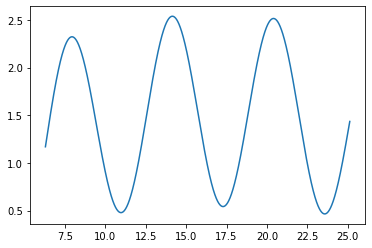

In [74]:
f = lambda x: np.sin(x) + 2*np.log(x) - np.sqrt(x)
x = np.arange(2*np.pi, 8*np.pi, 0.001)

plt.plot(x, f(x))

In [75]:
def random_ab(a, b):
    return (b-a)*np.random.random() + a

def random_walk(f, domain, max_iter=1000, verbose=False):
    x_star = None
    for i in range(max_iter):
        x = random_ab(domain[0], domain[1])
        if (x_star == None) or (f(x) > f(x_star)):
            x_star = x
        if verbose: print(x, f(x))
    return x_star

def hill_climb(f, domain, x0, epsilon=1e-3, max_iter=1000, verbose=False):
    x_star = x0
    for i in range(max_iter):
        if verbose: print(x_star, f(x_star))
        x_left = x_star - epsilon
        x_right = x_star + epsilon
        if (f(x_star) > f(x_left)) and (f(x_star) > f(x_right)):
            return x_star #local maxima
        elif (f(x_star) < f(x_left)) and (f(x_star) < f(x_right)): # local minima
            if f(x_left) > f(x_right):
                x_star = x_left
            else:
                x_star = x_right
        elif f(x_star) < f(x_left): # move left
            x_star = x_left
        elif f(x_star) < f(x_right): # move right
            x_star = x_right
    return x_star

In [76]:
random_walk(f, domain=[2*np.pi, 8*np.pi], max_iter=100, verbose=True)

21.766240281967523 1.7183069403514235
17.435521356191003 0.5536947995610335
22.16735574102219 1.313722608129205
19.245784450664658 1.9135241596856796
21.93427636267151 1.5495382909424995
20.283219940299112 2.5065103794172687
23.48100598178029 0.4699370650575263
18.885849148842283 1.5673258823616179
6.477773734976079 1.3849694354866324
24.407944068507614 0.7863940447380626
12.466668757003369 1.4157633979675568
13.51975743322831 2.3467628720920835
8.738871969579568 2.0127782880716203
14.976662061678297 2.210855691164261
18.96891089933944 1.649343220819108
14.799767292490552 2.3305715900099018
10.197931116545558 0.7525543057425752
24.457319420215516 0.8231982985034216
19.5038548852483 2.133510511823552
9.67460456188665 1.1813701480246315
8.741038893429431 2.0112293167334614
18.13036464707089 0.878423232317675
23.76780140727206 0.4825540801100896
22.309765557346164 1.1734740952758056
8.3232958594946 2.2449830024327797
21.417577170895747 2.043146434654809
22.959775841883964 0.65174265614250

14.21189169090016

In [77]:
f(14.21189)

2.5355013620071065

In [78]:
hill_climb(f, domain=[2*np.pi, 8*np.pi], x0=20, epsilon=1e-2, max_iter=100, verbose=True)

20 2.4322738428360298
20.01 2.436190804372557
20.020000000000003 2.440015848436169
20.030000000000005 2.4437485809789434
20.040000000000006 2.4473886171615575
20.050000000000008 2.4509355813918017
20.06000000000001 2.4543891073621653
20.07000000000001 2.4577488380864994
20.080000000000013 2.461014425935743
20.090000000000014 2.464185532672719
20.100000000000016 2.46726182948598
20.110000000000017 2.47024299702273
20.12000000000002 2.4731287254207786
20.13000000000002 2.475918714339559
20.140000000000022 2.4786126729901996
20.150000000000023 2.4812103201646174
20.160000000000025 2.4837113842636818
20.170000000000027 2.4861156033243956
20.180000000000028 2.48842272504612
20.19000000000003 2.4906325068158415
20.20000000000003 2.492744715732454
20.210000000000033 2.494759128630079
20.220000000000034 2.496675532100417
20.230000000000036 2.498493722514109
20.240000000000038 2.500213506041135
20.25000000000004 2.501834698670222
20.26000000000004 2.503357126227277
20.270000000000042 2.50478062

20.410000000000064

In [79]:
f(4.5*np.pi)

2.5376721533048476

# SA

In [114]:
def metropolis(f_x, f_x_star, t, minimisation=False):
    delta = (-1 if minimisation else 1)*(f_x_star - f_x)
    if delta > 0:
        return True
    return np.random.random() < np.exp(delta/t)

In [115]:
def peturb_TSP(sol):
    idxs = range(len(sol))
    first, second = np.random.choice(idxs, 2, replace=False)
    new_sol = sol.copy()
    new_sol[first], new_sol[second] = new_sol[second], new_sol[first]
    return new_sol

In [116]:
def quality_TSP_Gen(M):
    def quality_TSP(sol):
        cost = 0
        for i in range(len(sol)):
            cost += M[sol[i-1], sol[i]]
        return cost
    return quality_TSP

In [117]:
def SA(f, peturb, sol, per_temp, t0, alpha, minimisation=False, tol=1e-3, verbose=False):
    T = t0
    if verbose: print("initial guess: {0}, quality: {1}".format(sol, f(sol)))
    while T > tol:
        for _ in range(per_temp):
            sol_new = peturb(sol)
            if metropolis(f(sol), f(sol_new), T, minimisation=minimisation):
                sol = sol_new.copy()
        if verbose: print("Best Guess at T={0}: {1}, quality: {2}".format(T, sol, f(sol)))
        T = alpha*T
    if verbose: print("Best Guess: {0}, quality: {1}".format(sol, f(sol)))
    return sol, f(sol)

In [118]:
T = np.array([
    [0, 2053, 1155, 3017, 1385],
    [2053, 0, 1080, 3415, 939],
    [1155, 1080, 0, 3940, 285],
    [3017, 3415, 3940, 0, 3975],
    [1385, 939, 285, 3975, 0]
    ])

f = quality_TSP_Gen(T)
per_temp = 2
t0 = 1
tol=1e-2
verbose=True
sol_0 = [0, 1, 2, 3, 4]
alpha=0.8

In [120]:
f = quality_TSP_Gen(T)
per_temp = 10
t0 = 1
tol=1e-2
verbose=True
sol_0 = [0, 1, 2, 3, 4]
alpha=0.8

path, quality = SA(f=f, peturb=peturb_TSP, sol=sol_0, per_temp=per_temp, 
                   t0=t0, alpha=alpha, tol=tol, minimisation=True,
                   verbose=True)
path, quality

initial guess: [0, 1, 2, 3, 4], quality: 12433
Best Guess at T=1: [0, 1, 4, 2, 3], quality: 10234
Best Guess at T=0.8: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.6400000000000001: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.5120000000000001: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.40960000000000013: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.32768000000000014: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.2621440000000001: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.2097152000000001: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.1677721600000001: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.13421772800000006: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.10737418240000006: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.08589934592000005: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.06871947673600004: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.054975581388800036: [3, 1, 4, 2, 0], quality: 8811
Best Guess at T=0.043980465111040035: 

([3, 1, 4, 2, 0], 8811)

In [110]:
opt = [0, 2, 4, 1, 3]
f(opt)

8811

In [129]:
f = quality_TSP_Gen(T)
per_temp = 100
t0 = 100
tol=1e-6
verbose=True
sol_0 = [0, 1, 2, 3, 4]
alpha=0.98

path, quality = SA(f=f, peturb=peturb_TSP, sol=sol_0, per_temp=per_temp, 
                   t0=t0, alpha=alpha, tol=tol, minimisation=True,
                   verbose=False)
path, quality

([1, 3, 0, 2, 4], 8811)

# GA

In [126]:
def mutation_permutation(sol):
    idxs = range(len(sol))
    new_sol = sol.copy()
    first, second = np.random.choice(idxs, size=2, replace=False)
    new_sol[first], new_sol[second] = new_sol[second], new_sol[first]
    return new_sol


def crossover_permutation(sol1, sol2):
    idx = np.random.randint(len(sol1))
    sol = []
    for i in range(idx):
        sol += [sol1[i]]
    for i in range(len(sol2)):
        if sol2[i] not in sol:
            sol += [sol2[i]]
    return sol

def fittest_survive(num, cands, is_sorted=True, f=None):
    if is_sorted:
        return cands[:num]
    else:
        assert f!=None, "If candidates are not sorted by quality, a quality function must be provided"
        qual = [f(cand) for cand in cands]
        idxs = np.argsort(qual)
        use = idxs[:num]
        return cands[use]

def TSP_sampler_gen(T):
    def TSP_sampler():
        return np.random.choice(range(len(T)), size=len(T), replace=False)
    return TSP_sampler


In [127]:
def GA(f, pop_size, gens, sampler,
           crossover, crossover_p,
           mutation, mutation_p,
           num_survive, verbose=False):
    population = np.array([sampler() for _ in range(pop_size)])
    fitness = np.array([f(member) for member in population])    
    sorted_idxs = np.argsort(fitness)[::-1]
    fitness = fitness[sorted_idxs]
    population = population[sorted_idxs]
    probabilities = fitness/sum(fitness)

    if verbose: print('Initially, the fittest member is {0}, with fitness: {1}'.format(population[0], f(population[0])))
    for i in range(gens):
        if verbose: print('After {0} generations, the fittest member is {1}, with fitness: {2}'.format(i, population[0], f(population[0])))
        new_pop = np.array([[None]*len(population[0]) for _ in range(pop_size)])
        new_pop[:num_survive] = fittest_survive(num=num_survive, cands=population, is_sorted=True, f=f)
        for j in range(pop_size-num_survive):
            cand_idx = np.random.choice(len(population), p=probabilities)
            cand = population[cand_idx]
            if np.random.random()<mutation_p:
                cand = mutation(cand)
            if np.random.random()<crossover_p:
                cand2_idx = np.random.choice(len(population), p=probabilities)
                cand2 = population[cand2_idx]
                cand = crossover(cand, cand2)            
            new_pop[num_survive+j] = cand

        population = deepcopy(new_pop)
        fitness = np.array([f(member) for member in population])    
        sorted_idxs = np.argsort(fitness)[::-1]
        fitness = fitness[sorted_idxs]
        population = population[sorted_idxs]
        probabilities = fitness/sum(fitness)
    
    if verbose: print('The fittest member is {0}, with fitness: {1}'.format(population[0], f(population[0])))
        
    return population[0], fitness[0]

In [128]:
def quality_TSP_Gen_2(M):
    def quality_TSP(sol):
        cost = 0
        for i in range(len(sol)):
            cost += M[sol[i-1], sol[i]]
        return -cost
#         if cost == 0:
#             return 1e-10
#         else:
#             return 1/cost
    return quality_TSP

T = np.array([
    [0, 2053, 1155, 3017, 1385],
    [2053, 0, 1080, 3415, 939],
    [1155, 1080, 0, 3940, 285],
    [3017, 3415, 3940, 0, 3975],
    [1385, 939, 285, 3975, 0]
    ])

f = quality_TSP_Gen_2(T)
sol_0 = [0, 1, 2, 3, 4]

TSP_sampler = TSP_sampler_gen(T)

sol, fitness = GA(f=f, pop_size=10, gens=10, sampler=TSP_sampler,
   crossover=crossover_permutation, crossover_p=0.1,
   mutation=mutation_permutation, mutation_p=0.1,
   num_survive=1, verbose=True)

sol, -fitness

Initially, the fittest member is [1 2 4 0 3], with fitness: -9182
After 0 generations, the fittest member is [1 2 4 0 3], with fitness: -9182
After 1 generations, the fittest member is [1 2 4 0 3], with fitness: -9182
After 2 generations, the fittest member is [3 0 4 2 1], with fitness: -9182
After 3 generations, the fittest member is [1 3 0 4 2], with fitness: -9182
After 4 generations, the fittest member is [1 2 4 0 3], with fitness: -9182
After 5 generations, the fittest member is [1 2 4 0 3], with fitness: -9182
After 6 generations, the fittest member is [1 3 0 2 4], with fitness: -8811
After 7 generations, the fittest member is [1 3 0 2 4], with fitness: -8811
After 8 generations, the fittest member is [1 3 0 2 4], with fitness: -8811
After 9 generations, the fittest member is [1 3 0 2 4], with fitness: -8811
The fittest member is [1 3 0 2 4], with fitness: -8811


(array([1, 3, 0, 2, 4], dtype=object), 8811)